In [22]:
import joblib
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
import matplotlib.pyplot as plt
from sklearn.inspection import plot_partial_dependence

In [14]:
mydata = pd.read_csv(r'no catalyst.csv')
print(mydata)

X = mydata.values[:,:9]
Y = mydata.values[:,9:13]

mm_X = StandardScaler()
mm_Y = StandardScaler()
X = mm_X.fit_transform(X)
Y = mm_Y.fit_transform(Y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

     C (%)  H (%)  N (%)  O (%)  Ash (%)  SD (%)  T (oC)  P (MPa)  Time (min)  \
0    39.88   6.20   6.04  26.08    21.80    18.0   200.0      2.0          20   
1    39.88   6.20   6.04  26.08    21.80    18.0   220.0      2.6          20   
2    39.88   6.20   6.04  26.08    21.80    18.0   240.0      3.8          20   
3    39.88   6.20   6.04  26.08    21.80    18.0   260.0      5.0          20   
4    39.88   6.20   6.04  26.08    21.80    18.0   280.0      7.0          20   
..     ...    ...    ...    ...      ...     ...     ...      ...         ...   
290  41.53   5.76   1.55  49.55     1.61     5.0   850.0     32.0          10   
291  41.53   5.76   1.55  49.55     1.61    10.0   850.0     32.0          10   
292  41.53   5.76   1.55  49.55     1.61    15.0   850.0     32.0          10   
293  41.53   5.76   1.55  49.55     1.61    20.0   850.0     32.0          10   
294  41.53   5.76   1.55  49.55     1.61    15.0   850.0     32.0          10   

       CO2    CH4    CO    

# Hyper-parameter tuning for GBR

In [9]:
x =np.arange(2,50,5)
y=[0.01,0.05,0.1,1]
                                     
for i in x:
   for j in y:
       model = MultiOutputRegressor(GradientBoostingRegressor(n_estimators=i, learning_rate=j,
                                    subsample=1,max_depth=3,random_state=42))#
       scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')#scoring='neg_mean_squared_error'
       Scores1=-np.mean(scores)
       Scores2=Scores1**1/2
       std=np.std(scores)      
       print(i,j,Scores2,std)
       

2 0.01 0.48869804687940877 0.2513279472111821
2 0.05 0.4465832148848349 0.24216032841994894
2 0.1 0.4008796085309065 0.237603442808217
2 1 0.22008046088648778 0.11391202129847339
7 0.01 0.46227817260441517 0.2459269273048723
7 0.05 0.35258298790239573 0.2247401575720821
7 0.1 0.27051396621599233 0.20353126057644538
7 1 0.18093182985288317 0.09245083686467484
12 0.01 0.43844825650524033 0.2419339502126501
12 0.05 0.29249712308813663 0.20709903408584568
12 0.1 0.21181777242382266 0.18160650159757627
12 1 0.16730618356072713 0.09007453072442147
17 0.01 0.41649537199447995 0.23851956301851174
17 0.05 0.25274392791609773 0.1954318196069392
17 0.1 0.17866278262306598 0.1666868597230823
17 1 0.16337824262828832 0.09638057802627929
22 0.01 0.39643233835054287 0.2347913747482013
22 0.05 0.22497069033502903 0.18497961530647833
22 0.1 0.15601034744587475 0.15200049207119604
22 1 0.15845020617970382 0.09875802050344934
27 0.01 0.37878366518377743 0.22957041505338302
27 0.05 0.20340350074704933 0.1

In [8]:
"""Hyper-parameter tuning for GBR """

x=[0.5,0.6,0.7,0.8]
y =np.arange(3,20,2)
                                      
for i in x:
   for j in y:
       model = MultiOutputRegressor(GradientBoostingRegressor(n_estimators=32,learning_rate=0.1,
                                    subsample=i,max_depth=j,random_state=42))#
       scores = cross_val_score(model,X_train,y_train,cv=5,scoring='neg_mean_squared_error')#scoring='neg_mean_squared_error'
       Scores1=-np.mean(scores)
       Scores2=Scores1**1/2
       std=np.std(scores)     
       print(i,j,Scores2,std)


0.5 3 0.13298012614598084 0.11261429440079695
0.5 5 0.10502407481343715 0.10092762746628135
0.5 7 0.09768740936203588 0.0925798564560647
0.5 9 0.10116295186786033 0.09083467638207414
0.5 11 0.09556084617067911 0.09874333944103778
0.5 13 0.09616509715962318 0.09736401747493975
0.5 15 0.09867008759836285 0.10255786716795257
0.5 17 0.10128498452192754 0.09968877187329238
0.5 19 0.10028131686099358 0.09966148447598562
0.6 3 0.12468030945181455 0.11576095759263695
0.6 5 0.10732364139255494 0.10061643076647317
0.6 7 0.09993000800365923 0.1012915063228243
0.6 9 0.1011071890083874 0.09734151304778074
0.6 11 0.09776268123378495 0.10261527665347395
0.6 13 0.10180241114304492 0.10205621280743553
0.6 15 0.09819536860368139 0.09817801913464103
0.6 17 0.10052458752601863 0.09494878986347967
0.6 19 0.09959818161573844 0.0981843703778685
0.7 3 0.12695722834706263 0.12119626530059531
0.7 5 0.10929204763190987 0.10725008072321889
0.7 7 0.09877636817893244 0.10059467210602982
0.7 9 0.1012821606154815 0.1

# Model training and testing

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
model = MultiOutputRegressor(GradientBoostingRegressor(n_estimators=32, learning_rate=0.1,
                                subsample=0.5, max_depth=7,random_state=42))
model.fit(X_train,y_train)

y_train_pre=model.predict(X_train)
y_test_pre=model.predict(X_test)


In [38]:
r=r2_score(y_train, y_train_pre,multioutput='raw_values')
r2=r2_score(y_test, y_test_pre,multioutput='raw_values')

tMSE=mean_squared_error(y_train, y_train_pre,multioutput='raw_values')
tMSE=tMSE**0.5
MSE=mean_squared_error(y_test, y_test_pre,multioutput='raw_values')
MSE=MSE**0.5
print('train R2',np.around(r,2),'average train R2:',np.around(np.mean(r,axis=0),2),
      'test R2:',np.around(r2,2),'average test R2:',np.around(np.mean(r2,axis=0),2),
      'train RMSE:',np.around(tMSE,2), 'average train RMSE:',np.around(np.mean(tMSE,axis=0),2),
      'test RMSE:',np.around(MSE,2),'average test RMSE:',np.around(np.mean(MSE,axis=0),2))

train R2 [0.98 0.99 0.96 0.99] average train R2: 0.98 test R2: [0.95 0.92 0.95 0.93] average test R2: 0.94 train RMSE: [0.7  0.29 0.24 0.74] average train RMSE: 0.49 test RMSE: [1.31 0.51 0.29 1.85] average test RMSE: 0.99


# Model-based feature analysis

In [28]:
mydata = pd.read_csv(r'no catalyst.csv')
#print(mydata)
features=['C (%)','H (%)','N (%)','O (%)','Ash (%)',
         'SD (%)','T (oC)','P (MPa)','Time (min)']
targets=['H2']#,'CH4','CH4','CO',

X=mydata.loc[:,features].values
Y=mydata.loc[:,targets].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

Feature ranking:
1. feature 6 (0.543973)
2. feature 5 (0.110167)
3. feature 7 (0.084284)
4. feature 0 (0.074182)
5. feature 2 (0.060711)
6. feature 8 (0.056444)
7. feature 4 (0.034645)
8. feature 3 (0.027428)
9. feature 1 (0.008165)


C:\Users\Lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


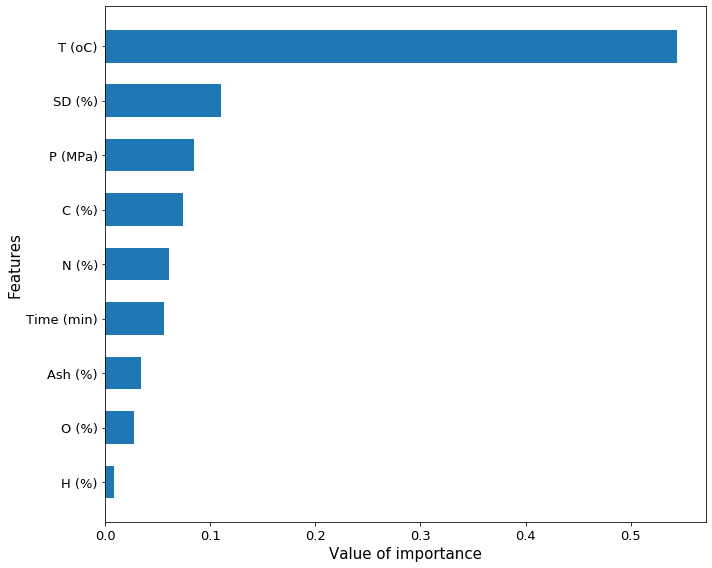

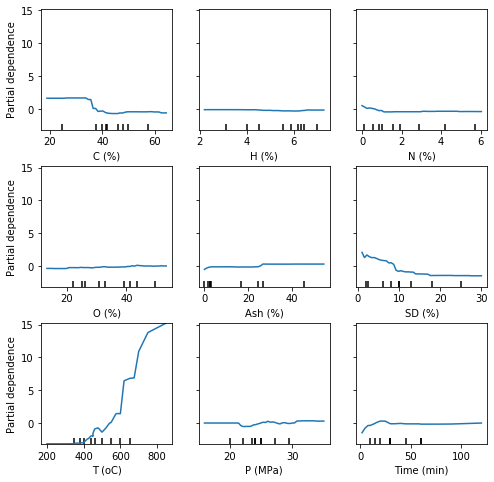

In [29]:

"""feature importance from single task one by one"""

model = GradientBoostingRegressor(n_estimators=32, learning_rate=0.1,
                               subsample=0.5, max_depth=7,random_state=42)
model.fit(X_train,y_train)

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
#Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
   print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
# Plot the feature importances
fig, ax = plt.subplots(figsize=(10, 8))
y_ticks = np.arange(len(mydata.columns.values[0:9]))
ax.barh(y_ticks,importances[indices],height=0.6)
ax.set_yticklabels(mydata.columns[indices])
ax.set_yticks(y_ticks)
ax.invert_yaxis()

label_x = ax.get_xticklabels()
plt.tick_params(axis='x',labelsize=13) 
plt.tick_params(axis='y',labelsize=13)
plt.xlabel('Value of importance', fontsize=15)        
plt.ylabel('Features', fontsize=15) 
fig.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(8, 8))
plot_partial_dependence(model,mydata.values[:,:9], features=
                       ['C (%)','H (%)','N (%)','O (%)','Ash (%)','SD (%)','T (oC)','P (MPa)','Time (min)'],
                       feature_names=mydata.columns[:9], n_jobs=3, grid_resolution=50,ax=ax)#,'T (oC)'
fig = plt.gcf()
fig.subplots_adjust(wspace=0.2, hspace=0.3)


# Model-based optimization

In [31]:
import numpy as np
import logging
from sklearn.ensemble import GradientBoostingRegressor
from pyswarm import pso
import joblib

lower_bounds=np.array([22.08,2.08,0,0.15,0,0.76,200,19.4,2])
upper_bounds=np.array([65.45,7.28,7.9, 54.79,57.87,30,850, 32, 120])

def objective(X):
    """
    We want to minimize the CO2 and maximize the H2 in syngas
    """
#    print('orignin',X[4])   
    model =joblib.load("nonWG_GBR_for_optimization")
    X[4]=100-X[0]-X[1]-X[2]-X[3]
#    print('post',X[4])
    x=np.array([X[0],X[1],X[2],X[3],X[4],X[5],X[6],X[7],X[8]]).reshape(1,9)
    y_predict = model.predict(x)
    
    return -y_predict[:,3] + y_predict[:,0]

logging.info(objective.__doc__)

X_opts = []
n_runs =5
for n in range(n_runs):
    logging.info('Run %d' % (n))
    X_opt, _ = pso(
        objective, lower_bounds, upper_bounds, #f_ieqcons=constraints,
        swarmsize=100, maxiter=200)
    X_opts.append(X_opt)
X_opts = np.asarray(X_opts)

Stopping search: maximum iterations reached --> 200
Stopping search: maximum iterations reached --> 200
Stopping search: maximum iterations reached --> 200
Stopping search: maximum iterations reached --> 200
Stopping search: maximum iterations reached --> 200


In [35]:
print(X_opts)
y_hat_opts = model.predict(X_opts).reshape(-1, 4)
print(y_hat_opts)

[[3.9170e+01 5.9600e+00 0.0000e+00 2.3340e+01 3.1530e+01 5.7600e+00
  8.4956e+02 1.9400e+01 8.6360e+01]
 [3.5490e+01 2.1000e+00 0.0000e+00 2.3180e+01 3.9230e+01 9.6200e+00
  7.8429e+02 2.0050e+01 1.0485e+02]
 [2.8960e+01 5.8800e+00 0.0000e+00 2.2740e+01 4.2430e+01 5.7200e+00
  7.9876e+02 2.1400e+01 8.0600e+01]
 [2.3840e+01 5.6300e+00 5.0000e-02 2.8090e+01 4.2380e+01 9.1000e-01
  8.5000e+02 2.0020e+01 8.3000e+01]
 [2.6350e+01 5.6400e+00 6.6300e+00 2.3760e+01 3.7620e+01 9.1000e-01
  6.2820e+02 2.5790e+01 4.4340e+01]]
[[18.92189931  7.56639811  0.77899031 37.34461219]
 [17.76112392  8.38647577  1.41824008 35.08871308]
 [18.91231422 10.22824958  0.95290705 37.34461219]
 [18.07344053 10.6824361   1.24571768 36.79033725]
 [ 6.93233445 10.07278771  0.48675031 22.63342754]]
